In [405]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## Men's Data

In [406]:
# Load data into Pandas dataframes
mRegDetail = pd.read_csv('data/men data/MRegularSeasonDetailedResults.csv')
mTournCompact = pd.read_csv('data/men data/MNCAATourneyCompactResults.csv')
mNames = pd.read_csv('data/men data/MTeamSpellings.csv')

In [407]:
display(mRegDetail.columns.values)

array(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF'], dtype=object)

In [408]:
# Split regular season detailed results into dataframes focused on outcome for one team
mRegWinners = pd.DataFrame()
mRegLossers = pd.DataFrame()

# Establish new columns for that includes stats for one team
columns = ['Season', 'TeamID', 'Score', 'OppScore',
       'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppPF']

In [409]:
# Split winners from regular season
mRegWinners[columns] = mRegDetail[['Season', 'WTeamID', 'WScore', 'LScore',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF']]

# Add wins and losses columns
mRegWinners['Wins'] = 1
mRegWinners['Losses'] = 0

In [410]:
# Split lossers from regular season
mRegLossers[columns] = mRegDetail[['Season', 'LTeamID', 'LScore', 'WScore',
       'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
       'WFGM3', 'WFGA3', 'WFTM', 'WFTA','WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF']]

# Add wins and losses columns
mRegLossers['Wins'] = 0
mRegLossers['Losses'] = 1

In [411]:
# Combine all games into one dataframe
mAllRegDetail = pd.concat([mRegWinners, mRegLossers])

In [412]:
# Sum stats for each season for each team for regular season
mRegSeasonDetail = mAllRegDetail.groupby(['Season', 'TeamID']).sum(numeric_only=True)
mRegSeasonDetail['NumGames'] = mRegSeasonDetail['Wins'] + mRegSeasonDetail['Losses']

In [413]:
display(mRegSeasonDetail.columns.values)

array(['Score', 'OppScore', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM',
       'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM',
       'OppFGA', 'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR',
       'OppDR', 'OppAst', 'OppTO', 'OppStl', 'OppBlk', 'OppPF', 'Wins',
       'Losses', 'NumGames'], dtype=object)

In [414]:
mRegSeasonDetail

Score  OppScore  NumOT  FGM   FGA  FGM3  FGA3  FTM  FTA   OR  \
Season TeamID                                                                 
2003   1102     1603      1596      0  536  1114   219   583  312  479  117   
       1103     2127      2110      8  733  1508   147   434  514  698  264   
       1104     1940      1820      1  673  1601   178   556  416  586  380   
       1105     1866      1993      4  634  1602   197   540  401  568  351   
       1106     1781      1785      1  656  1548   171   494  298  461  344   
...              ...       ...    ...  ...   ...   ...   ...  ...  ...  ...   
2025   1476     1964      2056      0  676  1561   250   701  362  499  204   
       1477     1995      2321      1  713  1714   260   828  309  480  246   
       1478     2091      2356      7  718  1609   221   669  434  605  216   
       1479     1842      2009      3  635  1507   196   549  376  466  174   
       1480     2033      2365      0  760  1779   159   536  354  513  245   

               ...  OppOR  OppDR  OppAst  OppTO  OppStl  OppBlk  OppPF  Wins  \
Season TeamID  ...                                                             
2003   1102    ...    269    564     256    363     152      44    514    12   
       1103    ...    325    595     418    414     173      77    606    13   
       1104    ...    305    634     327    388     155      89    539    17   
       1105    ...    343    686     411    489     244     109    496     7   
       1106    ...    317    626     330    422     246      89    452    13   
...            ...    ...    ...     ...    ...     ...     ...    ...   ...   
2025   1476    ...    258    644     299    289     196     111    457    13   
       1477    ...    311    728     491    404     286     119    476     5   
       1478    ...    302    671     464    318     215      84    512     7   
       1479    ...    233    662     389    351     161      79    472    12   
       1480    ...    234    754     471    326     206      93    461     5   

               Losses  NumGames  
Season TeamID                    
2003   1102        16        28  
       1103        14        27  
       1104        11        28  
       1105        19        26  
       1106        15        28  
...               ...       ...  
2025   1476        16        29  
       1477        26        31  
       1478        22        29  
       1479        16        28  
       1480        25        30  

[7981 rows x 32 columns]

In [415]:
mRegSeasonDetail.describe()

,Score,OppScore,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,...,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,Wins,Losses,NumGames
count,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,...,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000
mean,2074.908407,2074.908407,2.038592,730.481894,1670.609698,201.372886,586.539782,412.571733,589.485904,308.813557,...,308.813557,701.262123,387.635509,392.439669,192.658564,98.668964,540.972685,14.841373,14.841373,29.682747
std,283.860997,229.252643,1.767080,101.760242,193.137376,46.954447,120.412234,78.573769,107.677541,70.248796,...,58.974359,85.703983,57.324465,67.874634,31.737869,20.763284,74.427939,6.139575,5.296653,2.806203
min,292.000000,339.000000,0.000000,99.000000,229.000000,36.000000,104.000000,58.000000,85.000000,25.000000,...,37.000000,111.000000,80.000000,37.000000,31.000000,11.000000,75.000000,0.000000,0.000000,4.000000
25%,1896.000000,1947.000000,1.000000,666.000000,1561.000000,168.000000,502.000000,360.000000,520.000000,263.000000,...,271.000000,650.000000,352.000000,349.000000,172.000000,85.000000,496.000000,10.000000,11.000000,28.000000
50%,2081.000000,2086.000000,2.000000,731.000000,1681.000000,198.000000,580.000000,411.000000,589.000000,311.000000,...,312.000000,705.000000,388.000000,391.000000,192.000000,98.000000,543.000000,15.000000,15.000000,30.000000
75%,2263.000000,2223.000000,3.000000,796.000000,1796.000000,232.000000,666.000000,464.000000,658.000000,356.000000,...,349.000000,756.000000,425.000000,435.000000,213.000000,111.000000,590.000000,19.000000,19.000000,32.000000
max,3016.000000,2874.000000,12.000000,1113.000000,2282.000000,389.000000,1209.000000,709.000000,1020.000000,555.000000,...,523.000000,1040.000000,645.000000,704.000000,334.000000,181.000000,795.000000,34.000000,31.000000,36.000000


In [416]:
# Replace 0s in Losses with a small number to avoid dividing by 0
mRegSeasonDetail['Losses'] = mRegSeasonDetail['Losses'].replace(0, 1e-5)

In [417]:
# Create ___ per game stat for each boxscore stat
mRegSeasonFeatures = pd.DataFrame()

stats = ['Score', 'OppScore', 'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppPF']

for col in stats:
    mRegSeasonFeatures[col + '_PerGame'] = mRegSeasonDetail[col] / mRegSeasonDetail['NumGames']

In [418]:
# Create additional features
mRegSeasonFeatures['PointRatio'] = mRegSeasonDetail['Score'] / mRegSeasonDetail['OppScore'] # Points ratio
mRegSeasonFeatures['W/L'] = mRegSeasonDetail['Wins'] / mRegSeasonDetail['Losses'] # Win/Loss ratio
mRegSeasonFeatures['MOV'] = (mRegSeasonDetail['Score'] - mRegSeasonDetail['OppScore']) / mRegSeasonDetail['NumGames'] # Margin of victory
mRegSeasonFeatures['TORatio'] = mRegSeasonFeatures['TO_PerGame'] / mRegSeasonFeatures['OppTO_PerGame'] # Turnover ratio
mRegSeasonFeatures['FGM%'] = mRegSeasonDetail['FGM'] / mRegSeasonDetail['FGA'] # Scoring efficiency 
mRegSeasonFeatures['FG3%M'] = mRegSeasonDetail['FGM3'] / mRegSeasonDetail['FGA3'] # 3-Point efficiency
mRegSeasonFeatures['FGA3%'] = mRegSeasonDetail['FGA3'] / mRegSeasonDetail['FGA'] # 3-Point attempt rate
mRegSeasonFeatures['FTM%'] = mRegSeasonDetail['FTM'] / mRegSeasonDetail['FTA'] # Free throw makes %
mRegSeasonFeatures['FTA%'] = mRegSeasonDetail['FTA'] / mRegSeasonDetail['FGA'] # Free throw attempt rate
mRegSeasonFeatures['OppFTA%'] = mRegSeasonDetail['OppFTA'] / mRegSeasonDetail['OppFGA'] # Opponent free throw attempt rate
mRegSeasonFeatures['OR%'] = mRegSeasonDetail['OR'] / (mRegSeasonDetail['OR'] + mRegSeasonDetail['OppDR']) # Offensive rebound %
mRegSeasonFeatures['DR%'] = mRegSeasonDetail['DR'] / (mRegSeasonDetail['DR'] + mRegSeasonDetail['OppOR']) # Defensive rebound %

In [419]:
mRegSeasonFeatures

Score_PerGame  OppScore_PerGame  NumOT_PerGame  FGM_PerGame  \
Season TeamID                                                                
2003   1102        57.250000         57.000000       0.000000    19.142857   
       1103        78.777778         78.148148       0.296296    27.148148   
       1104        69.285714         65.000000       0.035714    24.035714   
       1105        71.769231         76.653846       0.153846    24.384615   
       1106        63.607143         63.750000       0.035714    23.428571   
...                      ...               ...            ...          ...   
2025   1476        67.724138         70.896552       0.000000    23.310345   
       1477        64.354839         74.870968       0.032258    23.000000   
       1478        72.103448         81.241379       0.241379    24.758621   
       1479        65.785714         71.750000       0.107143    22.678571   
       1480        67.766667         78.833333       0.000000    25.333333   

               FGA_PerGame  FGM3_PerGame  FGA3_PerGame  FTM_PerGame  \
Season TeamID                                                         
2003   1102      39.785714      7.821429     20.821429    11.142857   
       1103      55.851852      5.444444     16.074074    19.037037   
       1104      57.178571      6.357143     19.857143    14.857143   
       1105      61.615385      7.576923     20.769231    15.423077   
       1106      55.285714      6.107143     17.642857    10.642857   
...                    ...           ...           ...          ...   
2025   1476      53.827586      8.620690     24.172414    12.482759   
       1477      55.290323      8.387097     26.709677     9.967742   
       1478      55.482759      7.620690     23.068966    14.965517   
       1479      53.821429      7.000000     19.607143    13.428571   
       1480      59.300000      5.300000     17.866667    11.800000   

               FTA_PerGame  OR_PerGame  ...        MOV   TORatio      FGM%  \
Season TeamID                           ...                                  
2003   1102      17.107143    4.178571  ...   0.250000  0.881543  0.481149   
       1103      25.851852    9.777778  ...   0.629630  0.823671  0.486074   
       1104      20.928571   13.571429  ...   4.285714  0.958763  0.420362   
       1105      21.846154   13.500000  ...  -4.884615  0.991820  0.395755   
       1106      16.464286   12.285714  ...  -0.142857  1.130332  0.423773   
...                    ...         ...  ...        ...       ...       ...   
2025   1476      17.206897    7.034483  ...  -3.172414  1.124567  0.433056   
       1477      15.483871    7.935484  ... -10.516129  1.121287  0.415986   
       1478      20.862069    7.448276  ...  -9.137931  1.185535  0.446240   
       1479      16.642857    6.214286  ...  -5.964286  0.777778  0.421367   
       1480      17.100000    8.166667  ... -11.066667  0.969325  0.427206   

                  FG3%M     FGA3%      FTM%      FTA%   OppFTA%       OR%  \
Season TeamID                                                               
2003   1102    0.375643  0.523339  0.651357  0.429982  0.453704  0.171806   
       1103    0.338710  0.287798  0.736390  0.462865  0.388564  0.307334   
       1104    0.320144  0.347283  0.709898  0.366021  0.308880  0.374753   
       1105    0.364815  0.337079  0.705986  0.354557  0.415525  0.338476   
       1106    0.346154  0.319121  0.646421  0.297804  0.411371  0.354639   
...                 ...       ...       ...       ...       ...       ...   
2025   1476    0.356633  0.449071  0.725451  0.319667  0.330079  0.240566   
       1477    0.314010  0.483081  0.643750  0.280047  0.364834  0.252567   
       1478    0.330344  0.415786  0.717355  0.376010  0.371396  0.243517   
       1479    0.357013  0.364300  0.806867  0.309224  0.382775  0.208134   
       1480    0.296642  0.301293  0.690058  0.288364  0.362573  0.245245   

                    DR%  
Season TeamID            
2003   

In [420]:
mTournCompact

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2513,2024,146,1301,76,1181,64,N,0
2514,2024,146,1345,72,1397,66,N,0
2515,2024,152,1163,86,1104,72,N,0
2516,2024,152,1345,63,1301,50,N,0


In [421]:
# Split compact tournament results into individual rows of winners and losers to introduce target feature "Result"
mWTourney = pd.DataFrame()
mWTourney[['Season', 'Team1', 'Team2']] = mTournCompact[['Season', 'WTeamID', 'LTeamID']]
mWTourney['Result'] = 1

mLTourney = pd.DataFrame()
mLTourney[['Season', 'Team1', 'Team2']] = mTournCompact[['Season', 'LTeamID', 'WTeamID']]
mLTourney['Result'] = 0

# Join individual together and drop games earlier than 03 to match up with regular season data
mTourneyInput = pd.concat([mWTourney, mLTourney])
mTourneyInput = mTourneyInput[mTourneyInput['Season'] >= 2003].reset_index(drop=True)

In [422]:
mTourneyInput

,Season,Team1,Team2,Result
0,2003,1421,1411,1
1,2003,1112,1436,1
2,2003,1113,1272,1
3,2003,1141,1166,1
4,2003,1143,1301,1
...,...,...,...,...
2759,2024,1181,1301,0
2760,2024,1397,1345,0
2761,2024,1104,1163,0
2762,2024,1301,1345,0


In [423]:
# Merge two team stats from mRegSeasonFeatures
mTourneyFinal = mTourneyInput.merge(mRegSeasonFeatures, left_on=['Season', 'Team1'], right_index=True, suffixes=('', '_T1'))
mTourneyFinal = mTourneyFinal.merge(mRegSeasonFeatures, left_on=['Season', 'Team2'], right_index=True, suffixes=('_T1', '_T2'))

# Drop columns that are not needed
mTourneyFinal.drop(columns=['Season', 'Team1', 'Team2'], inplace=True)

# Calculate the differences (Team1 - Team2) for the features for inpout to linear regression
featureCols = [col for col in mRegSeasonFeatures if col not in ['Season', 'TeamID']]
for col in featureCols:
       mTourneyFinal[col + '_Diff'] = mTourneyFinal[col + '_T1'] - mTourneyFinal[col + '_T2']
       
# Drop all _T1 and _T2, keep only _Diff and Result
mTourneyFinal = mTourneyFinal[[col + '_Diff' for col in featureCols] + ['Result']]

In [424]:
mTourneyFinal

,Score_PerGame_Diff,OppScore_PerGame_Diff,NumOT_PerGame_Diff,FGM_PerGame_Diff,FGA_PerGame_Diff,FGM3_PerGame_Diff,FGA3_PerGame_Diff,FTM_PerGame_Diff,FTA_PerGame_Diff,OR_PerGame_Diff,...,TORatio_Diff,FGM%_Diff,FG3%M_Diff,FGA3%_Diff,FTM%_Diff,FTA%_Diff,OppFTA%_Diff,OR%_Diff,DR%_Diff,Result
0,-1.593103,7.614943,0.139080,-0.354023,1.526437,0.549425,-0.500000,-1.434483,-7.135632,-0.890805,...,0.200650,-0.018262,0.039433,-0.017801,0.142815,-0.139292,0.059755,-0.015697,-0.047099,1
1,17.421182,7.112069,0.002463,5.493842,9.852217,1.759852,4.588670,4.673645,5.448276,2.213054,...,-0.205109,0.016969,0.009777,0.028274,0.043580,0.030435,-0.012280,0.022337,-0.050163,1
2,1.448276,3.344828,0.034483,0.931034,-3.103448,-3.000000,-7.482759,2.586207,3.310345,-0.379310,...,-0.013110,0.040251,-0.030989,-0.113271,0.016122,0.078997,0.010485,0.026172,0.001629,1
3,0.102403,8.908046,-0.030303,-2.076280,-4.764890,-1.142111,-2.553814,5.397074,5.142111,-0.292581,...,0.351889,0.005763,-0.008284,-0.016226,0.072864,0.129120,0.077414,0.021658,-0.021651,1
4,2.082759,1.758621,0.070115,3.011494,5.390805,-1.552874,-5.465517,-2.387356,-0.949425,1.508046,...,-0.021196,0.009399,0.022444,-0.131799,-0.084846,-0.051395,-0.102222,0.015999,0.009181,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,3.482639,-5.256944,-0.083333,1.142361,-1.753472,1.288194,1.736111,-0.090278,0.194444,-0.055556,...,0.061522,0.032591,0.031070,0.039218,-0.011645,0.012902,-0.043363,0.024170,0.024492,0
2760,-3.925189,-2.276515,-0.090909,-1.077652,3.356061,0.385417,5.075758,-2.155303,-3.812500,-0.280303,...,-0.355366,-0.043992,-0.066100,0.063189,0.028050,-0.085009,0.127730,-0.050729,-0.036588,0
2761,9.279412,16.650735,0.062500,1.818015,6.102941,2.268382,6.310662,3.375000,3.283088,0.943015,...,0.143301,-0.018671,-0.001546,0.058938,0.041092,0.019318,0.071454,-0.018376,-0.046929,0
2762,-7.032828,2.542929,-0.007576,-1.126263,2.578283,-1.277778,-0.035354,-3.502525,-5.194444,-1.974747,...,-0.354789,-0.039121,-0.061963,-0.015370,0.012308,-0.103297,0.089519,-0.098329,-0.031517,0


In [425]:
mTourneyFinal.describe()

,Score_PerGame_Diff,OppScore_PerGame_Diff,NumOT_PerGame_Diff,FGM_PerGame_Diff,FGA_PerGame_Diff,FGM3_PerGame_Diff,FGA3_PerGame_Diff,FTM_PerGame_Diff,FTA_PerGame_Diff,OR_PerGame_Diff,...,TORatio_Diff,FGM%_Diff,FG3%M_Diff,FGA3%_Diff,FTM%_Diff,FTA%_Diff,OppFTA%_Diff,OR%_Diff,DR%_Diff,Result
count,2764.000000,2764.000000,2764.000000,2764.000000,2.764000e+03,2764.000000,2.764000e+03,2764.000000,2764.000000,2764.000000,...,2764.000000,2764.000000,2764.000000,2.764000e+03,2764.000000,2.764000e+03,2764.000000,2764.000000,2.764000e+03,2764.00000
mean,0.000000,0.000000,0.000000,0.000000,8.226255e-17,0.000000,1.028282e-17,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.606690e-19,0.000000,3.213381e-19,0.000000,0.000000,-1.606690e-19,0.50000
std,7.312093,6.355166,0.072274,2.914355,4.695264e+00,1.806670,4.223095e+00,2.702947,3.648958,2.494943,...,0.195575,0.032604,0.037261,7.191683e-02,0.050658,6.419949e-02,0.079799,0.056490,4.051447e-02,0.50009
min,-22.892857,-25.035714,-0.293169,-9.357143,-2.207143e+01,-6.062500,-1.427849e+01,-10.205882,-13.094118,-9.214286,...,-0.606506,-0.135937,-0.139760,-2.727839e-01,-0.172779,-2.451213e-01,-0.289826,-0.191864,-1.449883e-01,0.00000
25%,-4.857429,-4.330079,-0.035104,-1.987506,-3.081258e+00,-1.211338,-2.766433e+00,-1.836522,-2.405540,-1.675716,...,-0.136510,-0.021822,-0.023834,-4.953287e-02,-0.034681,-4.227682e-02,-0.055724,-0.037664,-2.744192e-02,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.50000
75%,4.857429,4.330079,0.035104,1.987506,3.081258e+00,1.211338,2.766433e+00,1.836522,2.405540,1.675716,...,0.136510,0.021822,0.023834,4.953287e-02,0.034681,4.227682e-02,0.055724,0.037664,2.744192e-02,1.00000
max,22.892857,25.035714,0.293169,9.357143,2.207143e+01,6.062500,1.427849e+01,10.205882,13.094118,9.214286,...,0.606506,0.135937,0.139760,2.727839e-01,0.172779,2.451213e-01,0.289826,0.191864,1.449883e-01,1.00000


## Logistic Regression

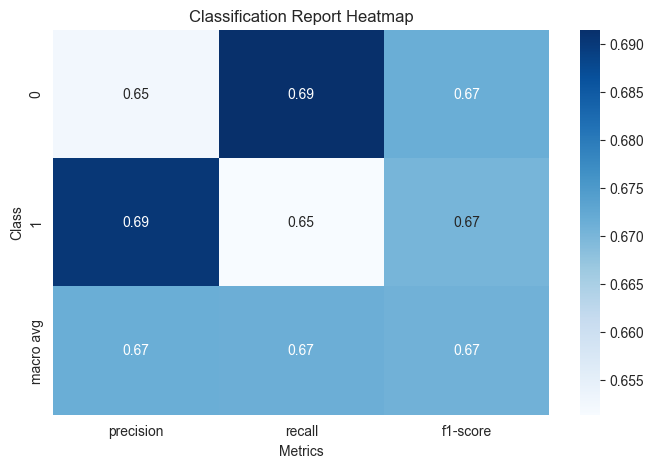

In [426]:
# Setup scaler
scaler = StandardScaler()

# Setup input and target
X = mTourneyFinal.drop(columns=['Result'])
y = mTourneyFinal['Result']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit scaler on training data and transform both train and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform (not fit_transform) on test set to prevent data leakage

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get model predictions
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
DFReport = pd.DataFrame(report).T.drop(['accuracy'])

# Plot Precision, Recall, and F1-Score
plt.figure(figsize=(8, 5))
sns.heatmap(DFReport.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")

plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()

## Hyperparameter Tuning

In [427]:
# Perform grid search
grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [100, 250, 500, 750, 1000],
    'tol': [1e-4, 1e-5]
}

gridLog = LogisticRegression()
gridSearch = GridSearchCV(gridLog, grid, cv=5, scoring=['precision', 'recall', 'f1'], refit='f1')
gridSearch.fit(X_train, y_train)
print(f'Best Params: {gridSearch.best_params_}')

C:\Users\Trever\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Trever\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Trever\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Trever\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Trever\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means

Best Params: {'C': 1, 'max_iter': 100, 'solver': 'sag', 'tol': 0.0001}


C:\Users\Trever\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Trever\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


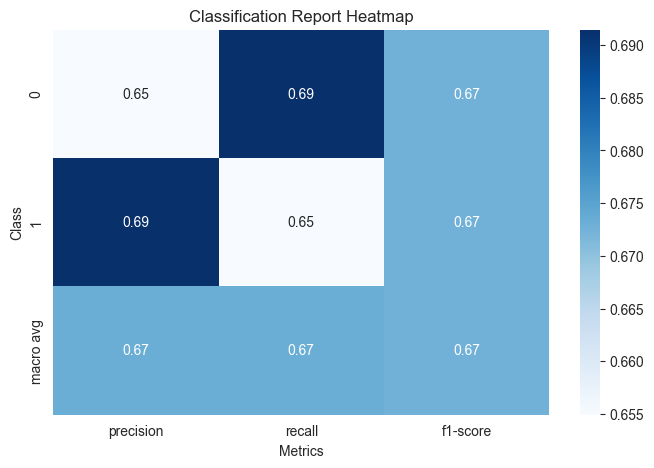

In [429]:
# Train with new parameters
newModel = LogisticRegression(
    C=1,
    max_iter=1000,
    solver='saga',
    tol=0.0001
)
newModel.fit(X_train, y_train)

# Get model predictions
y_pred = newModel.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
DFReport = pd.DataFrame(report).T.drop(['accuracy'])

# Plot Precision, Recall, and F1-Score
plt.figure(figsize=(8, 5))
sns.heatmap(DFReport.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")

plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()